In [14]:
# Import necessary libraries
from sklearn.datasets import fetch_openml
import pandas as pd

# Load the Wine Quality dataset
data = fetch_openml(name='wine-quality-red', as_frame=True)

# Combine features and target into a single DataFrame
df = pd.concat([data.data, data.target.rename('quality')], axis=1)

# Save the DataFrame to a CSV file
df.to_csv("wine_quality.csv", index=False)

# Display the first few rows of the DataFrame
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
# Import necessary libraries for preprocessing
from sklearn.preprocessing import StandardScaler

# Load the dataset from the CSV file
df = pd.read_csv("wine_quality.csv")

# Separate features and target variable
X = df.drop('quality', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display the first few rows of the scaled features
pd.DataFrame(X_scaled, columns=X.columns).head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [16]:
# Import KMeans from Scikit-learn
from sklearn.cluster import KMeans

# Set the number of clusters
n_clusters = 3

# Initialize KMeans
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model to the scaled data
kmeans.fit(X_scaled)

# Get the cluster labels
df['cluster'] = kmeans.labels_

# Display the first few rows with cluster labels
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


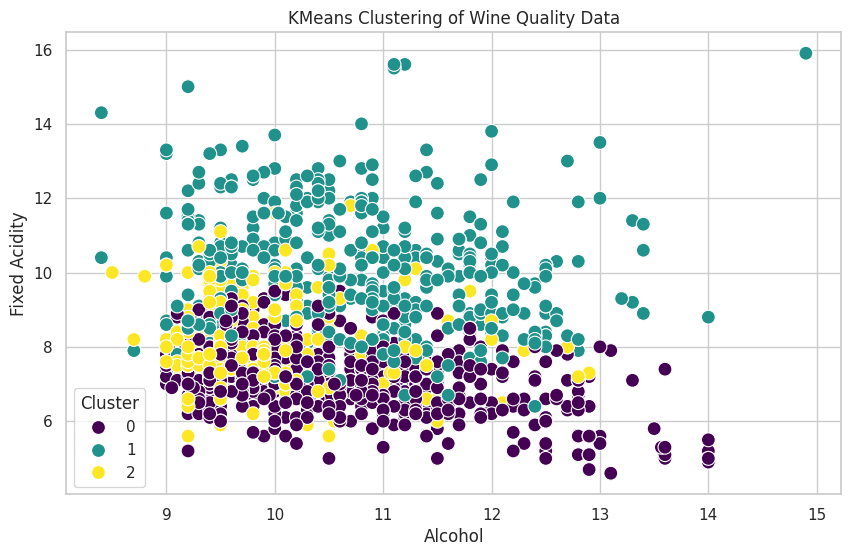

In [19]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")

# Create a scatter plot of alcohol vs acidity, color-coded by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='alcohol', y='fixed_acidity', hue='cluster', palette='viridis', s=100)
plt.title('KMeans Clustering of Wine Quality Data')
plt.xlabel('Alcohol')
plt.ylabel('Fixed Acidity')
plt.legend(title='Cluster')
plt.show()

In [18]:
# Check the column names in the DataFrame
print(df.columns)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'cluster'],
      dtype='object')
